In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#Loading the cleaned data
clean_file_path = "/content/sample_data/clean_frailty_data.csv"
data = pd.read_csv(clean_file_path)

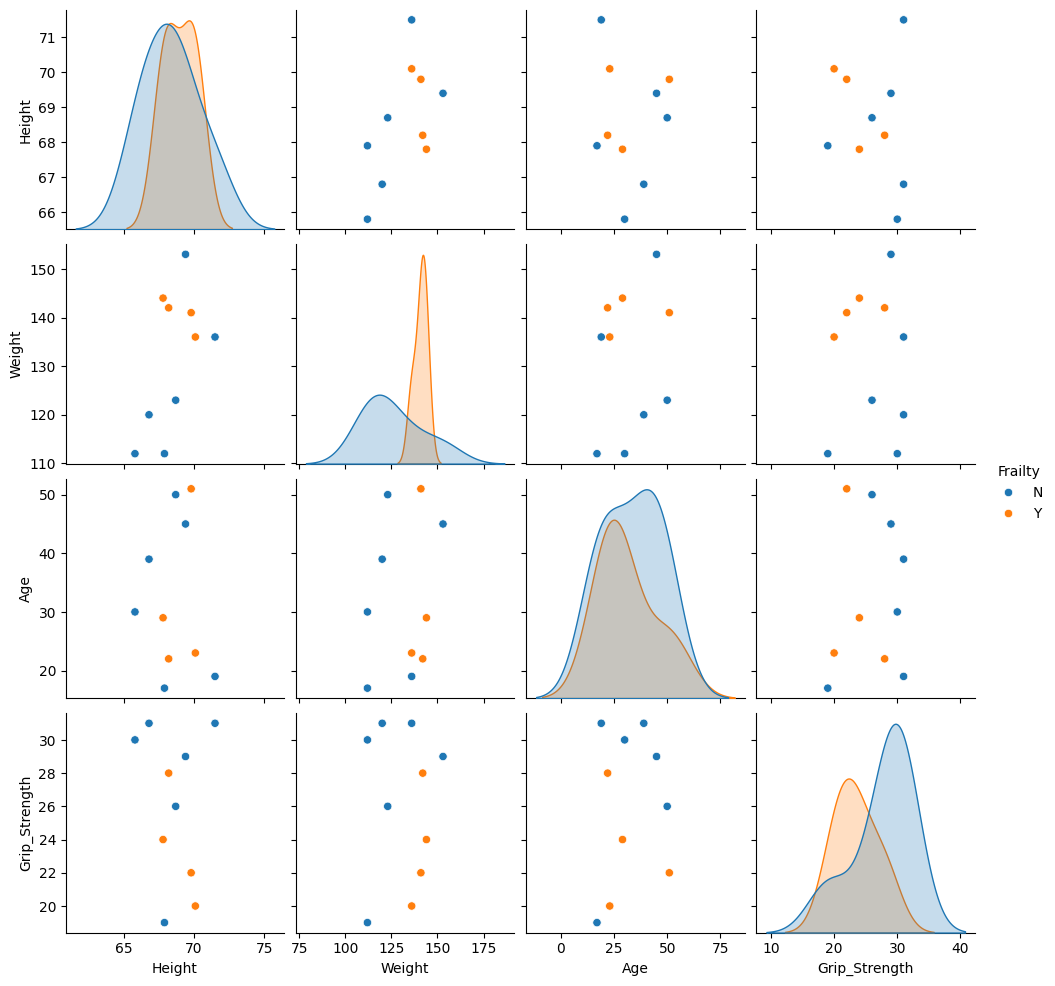

In [3]:
#Performing Exploratory data analysis
sns.pairplot(data, hue='Frailty')
plt.show()

In [5]:
file = "/content/sample_data/clean_frailty_data.csv"
frailty_data = pd.read_csv(file)

In [6]:
#summarizing statistics of the dataset
print("Summarizing of the dataset")
print(frailty_data.describe())

Summarizing of the dataset
          Height      Weight        Age  Grip_Strength
count  10.000000   10.000000  10.000000      10.000000
mean   68.600000  131.900000  32.500000      26.000000
std     1.670662   14.231811  12.860361       4.521553
min    65.800000  112.000000  17.000000      19.000000
25%    67.825000  120.750000  22.250000      22.500000
50%    68.450000  136.000000  29.500000      27.000000
75%    69.700000  141.750000  43.500000      29.750000
max    71.500000  153.000000  51.000000      31.000000


In [7]:
#Changing frailty column to categorical variable
frailty_data['Frailty'] = pd.Categorical(frailty_data['Frailty'])

In [15]:
#Applying t-test for comparing weight between frail and non-frail categories
frail = frailty_data[frailty_data['Frailty'] == 'Y']['Weight']
non_frail = frailty_data[frailty_data['Frailty'] == 'N']['Weight']

In [18]:
#Applying t-test by considering unequal variances between categories
t_stat, p_val = ttest_ind(frail, non_frail, equal_var=False)

In [20]:
#Printing t-test outputs
print("\nT-test outputs:")
print("T_statistic:", t_stat)
print("P_value:", p_val)


T-test outputs:
T_statistic: 2.1964625958466355
P_value: 0.07309706417382401


In [25]:
#Storing t-test outcomes to a text file
output_file_path = "/content/sample_data/output.txt"
with open(output_file_path, 'w') as file:
    file.write("T-test outputs for comparing weight between frail and non-frail categories:\n")
    file.write("T_statistic: {}\n".format(t_stat))
    file.write("P_value: {}\n".format(p_val))